<div class="markdown-google-sans">

# **Collect CEFR Fluency Dataset for Fluency Evaluation 🤗**

Collect CEFR Fluency Dataset for Fluency Evaluation from CEFR Fluency Audio Dataset.

</div>


<div class="markdown-google-sans">

## **Information 😲**
</div>

**Title:** Collect CEFR Fluency Dataset for Fluency Evaluation<br>
**Description:** Collect CEFR Fluency Dataset for Fluency Evaluation from CEFR Fluency Audio Dataset<br>
**Code Writer:** Hafid Ikhsan Arifin<br>
**Date created:** 2023/07/13<br>
**Last modified:** 2023/07/13 (9:00 PM)<br> <!-- Edit Here -->
**Version:** 1.1.0<br> <!-- Edit Here -->

**Dataset version:**

<!-- Edit Here -->
| Version | Type                   | Used | Pub  |
|---------| ---------------------- | ---- | ---- |
| 1       | Real (Unbalance)       |  ✅  |  ✅  |
| 2       | Undersampling          |    |    |
| 3       | Oversampling Augmented |    |    |
| 4       | Oversampling Duplicate |    |    |

**Notebook:**<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1t0z7PoJ5Rst0qXV6oYtTH8pb-4LsWG7O?usp=sharing)
[![GitHub watchers](https://img.shields.io/github/watchers/Naereen/StrapDown.js.svg?style=social&label=Watch&maxAge=2592000)](https://github.com/IELTSSpeakingApplication/MachineLearning)

**Dataset:**<br>
[![Google Drive](https://img.shields.io/badge/Google%20Drive-4285F4?style=for-the-badge&logo=googledrive&logoColor=white)](https://drive.google.com/drive/folders/1xXj1cSRyQ5-4eNS16tK0Vauai_nkLoFL?usp=sharing)

<div class="markdown-google-sans">

## **Introduction 🤔**
</div>

For fluency evaluation, I create my own custom dataset called [CEFR Fluency Dataset](https://drive.google.com/file/d/1rFDDyk1a4SRIm6CK3f7-kk6JTza5V2pN/view?usp=sharing). [CEFR Fluency Dataset](https://drive.google.com/file/d/1rFDDyk1a4SRIm6CK3f7-kk6JTza5V2pN/view?usp=sharing) consists of 2807 audio files obtained from the YouTube audio of IELTS test participants. Audio has been categorized into 6 [CEFR](https://www.cambridgeenglish.org/exams-and-tests/cefr/) classes:

*   `A1` (0 - 3 IELTS Band)
*   `A2` (3.5 - 4 IELTS Band)
*   `B1` (4.5 - 5 IELTS Band)
*   `B2` (5.5 - 6.5 IELTS Band)
*   `C1` (7 - 8 IELTS Band)
*   `C2` (8.5 - 9 IELTS Band)

Original dataset is available in [Drive](https://drive.google.com/file/d/1rFDDyk1a4SRIm6CK3f7-kk6JTza5V2pN/view?usp=sharing)

The dataset that I have been collect is unbalance, So to get better model preformance I will create 4 version dataset that is `Real` dataset (unbalance), balance the dataset with `Undersampling`, `Oversampling Augmented`, and `Oversampling Duplicate`. The following are the steps that I will take to create the dataset.

1.   Create dataset folder
2.   Load original dataset
3.   Define augmentation
4.   Define some function to create dataset
5.   Get list of dataset sub directory
6.   Get audio path information
7.   Grouping audio path information
8.   Get audio data information
9.   Select dataset type
10.  Define function to visualize dataset
11.  Visualize dataset
12.  Save dataset

This dataset will be available on my drive [CEFR Fluency Dataset](https://drive.google.com/drive/folders/1xXj1cSRyQ5-4eNS16tK0Vauai_nkLoFL?usp=sharing) folder.

Let's code 😋

<div class="markdown-google-sans">

## **Preparation 🧐**
</div>

The first step I will install required library. For audio augmentation I use [audiomentations](https://github.com/iver56/audiomentations) library.

In [1]:
# Install library
%%capture
!pip install audiomentations[extras]

In [2]:
#@title Check installed library
import audiomentations

try:
    audiomentations_version = audiomentations.__version__
    print("Libraries installed")
except:
    print("Libraries not installed")

Libraries installed


Next, I will import required libraries.

In [3]:
# Import library
import os
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
from IPython import display
from google.colab import drive
import matplotlib.pyplot as plt
from audiomentations import AirAbsorption, AddGaussianNoise, Limiter, Trim

I will save dataset to my drive, so I mush get the drive access in my colab.

In [4]:
# Drive Access
drive.mount("/content/drive")

Mounted at /content/drive


To make the process easier, I will define some global parameters for create dataset.

In [5]:
# Define global parameter
N_MFCC = 30
PARENT_DIR = "dataset/"
COLUMNS = ["Path", "Class"]

PNG = ".png"

REAL_COUNT = '"Real Dataset"'
REAL_CSV = "dataset_path.csv"
DATASET_CSV = "dataset.csv"
A1_SAMPLE = "A1.png"
A2_SAMPLE = "A2.png"
B1_SAMPLE = "B1.png"
B2_SAMPLE = "B2.png"
C1_SAMPLE = "C1.png"
C2_SAMPLE = "C2.png"
REAL_NUMPY_DATASET = "dataset_real.npy"
FINAL_DATASET = '"Final Dataset"'

COLAB_BASE_PATH = "/content/"

# Edit Here
DRIVE_TARGET_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Fluency/Dataset/"CEFR Fluency Dataset"/"Real"'''

Last I will make pandas view is big.

In [6]:
# Make pandas dataframe big
pd.set_option("display.max_colwidth", None)

<div class="markdown-google-sans">

## **Create Dataset 🤯**
</div>

To create dataset, first I will make new dataset directory in colab.

In [7]:
# Make new dataset folder
!mkdir dataset

Next I will copy the original dataset to colab and unzip the dataset.

In [8]:
# Copy dataset
!cp -r /content/drive/MyDrive/"Final Project"/"Machine Learning"/Fluency/Dataset/"All.zip" /content/

In [9]:
# Unzip data
!unzip "All.zip"

Streaming output truncated to the last 5000 lines.
  inflating: All/B2/IELTS Speaking Test band score 6 with feedback 2023 [aI0JX2qc870]2:54to2:59-TRIM.mp3  
  inflating: __MACOSX/All/B2/._IELTS Speaking Test band score 6 with feedback 2023 [aI0JX2qc870]2:54to2:59-TRIM.mp3  
  inflating: All/B2/IELTS Speaking Interview ｜ BAND 5.5 ｜ Live Band Score Analysis [5OgBY_n4NJo][14]-TRIM.mp3  
  inflating: __MACOSX/All/B2/._IELTS Speaking Interview ｜ BAND 5.5 ｜ Live Band Score Analysis [5OgBY_n4NJo][14]-TRIM.mp3  
  inflating: All/B2/IELTS Speaking Interview ｜ BAND 6.0 ｜ Real Test! [4nt0W8qNLfE][4]-TRIM.mp3  
  inflating: __MACOSX/All/B2/._IELTS Speaking Interview ｜ BAND 6.0 ｜ Real Test! [4nt0W8qNLfE][4]-TRIM.mp3  
  inflating: All/B2/IBM IELTS SPEAKING TEST BAND 5 5 [bWI5cdhSOMw]10n10to10n20-TRIM.mp3  
  inflating: __MACOSX/All/B2/._IBM IELTS SPEAKING TEST BAND 5 5 [bWI5cdhSOMw]10n10to10n20-TRIM.mp3  
  inflating: All/B2/IELTS Speaking Interview ｜ Band 6 ｜ Real Exam! [mZF0irCXLTQ][7]-TRIM.mp3 

Next I will copy all audio file into my new dataset directory.

In [10]:
# Copy clone dataset to dataset folder
!cp -r /content/All/A1 /content/dataset
!cp -r /content/All/A2 /content/dataset
!cp -r /content/All/B1 /content/dataset
!cp -r /content/All/B2 /content/dataset
!cp -r /content/All/C1 /content/dataset
!cp -r /content/All/C2 /content/dataset

For audio data augmentation, First I must declare the augmentation variable. For augmentation I only use 4 type of augmentation namely [`AirAbsorption`](https://iver56.github.io/audiomentations/waveform_transforms/air_absorption/), [`AddGaussianNoise`](https://iver56.github.io/audiomentations/waveform_transforms/add_gaussian_noise/), [`Limiter`](https://iver56.github.io/audiomentations/waveform_transforms/limiter/), and [`Trim`](https://iver56.github.io/audiomentations/waveform_transforms/trim/). I only use these type of augmentation because these augmentation is not much change the critical aspect in speech fluency.

In [11]:
# Define transform variable
transform_air = AirAbsorption(
    min_distance=10.0,
    max_distance=50.0,
    p=1.0,
)

transform_noise = AddGaussianNoise(
    min_amplitude=0.001,
    max_amplitude=0.015,
    p=1.0
)

transform_trim = Trim(
    top_db=30.0,
    p=1.0
)

transform_limit = Limiter(
    min_threshold_db=-16.0,
    max_threshold_db=-6.0,
    threshold_mode="relative_to_signal_peak",
    p=1.0,
)

Next, I will declare some general function to create dataset.

In [12]:
# Define function for feature extraction
def feature_extraction(file_name, aug):
    # Load audio
    X, sample_rate = librosa.load(file_name)

    # If augmentation
    if aug == 1:
        X = transform_air(X, sample_rate=sample_rate)
    elif aug == 2:
        X = transform_noise(X, sample_rate=sample_rate)
    elif aug == 3:
        X = transform_trim(X, sample_rate=sample_rate)
    elif aug == 4:
        X = transform_limit(X, sample_rate=sample_rate)

    # Transform audio
    if X.ndim > 1:
        X = X[:, 0]
    X = X.T

    # Get audio data
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=N_MFCC).T, axis=0)
    rmse = np.mean(librosa.feature.rms(y=X).T, axis=0)
    spectral_flux = np.mean(librosa.onset.onset_strength(y=X, sr=sample_rate).T, axis=0)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0)

    return mfccs, rmse, spectral_flux, zcr

In [13]:
# Define function to parsing audio
def parse_audio_files(sub_dirs, parent_dir, aug):
    # Define some variable
    number_of_features = 5 + N_MFCC
    dataset = np.empty((0, number_of_features))

    # Loop in directory
    for sub_dir in sub_dirs:
        for file_name in os.scandir(os.path.join(parent_dir, sub_dir)):
            print("Actual File Name: ", file_name.path)
            try:
                mfccs, rmse, spectral_flux, zcr = feature_extraction(file_name.path, aug)
            except Exception as e:
                print("[Error] there was an error in feature extraction. %s" % (e))
                continue

            extracted_features = np.hstack([mfccs, rmse, spectral_flux, zcr, sub_dir, file_name.path])
            dataset = np.vstack([dataset, extracted_features])
        print("Extracted features from %s, done" % (sub_dir))

    return np.array(dataset)

In [14]:
# Define function to get numpy
def folder_to_dataframe(sub_dirs, parent_dir):
    folders = np.empty((0, 2))

    # Loop in subdir
    for sub_dir in sub_dirs:
          for file_name in os.scandir(os.path.join(parent_dir, sub_dir)):
              folder_path = np.hstack([file_name.path, sub_dir])
              folders = np.vstack([folders, folder_path])

    return np.array(folders)

Next I will define list of dataset subdirectory.

In [15]:
# Define real audio path
audio_subdirectories_real = os.listdir(PARENT_DIR)
audio_subdirectories_real.sort()
print("Audio Subdirs:", audio_subdirectories_real)

Audio Subdirs: ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']


After get lis of dataset subdirectory, Next I will parsing to numpy and display the audio path in dataframe.

In [16]:
# Parsing file path real to numpy
folders_real = folder_to_dataframe(audio_subdirectories_real, PARENT_DIR)

In [17]:
# Display dataframe path real
df_folder_real = pd.DataFrame(folders_real, columns=COLUMNS)
df_folder_real.head()

Path  \
0  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]6n11to6n21-TRIM.mp3   
1          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]9n49to9n58-TRIM.mp3   
2  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]3n15to3n22-TRIM.mp3   
3          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]4n42to4n52-TRIM.mp3   
4                dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]7n35to7n45-TRIM.mp3   

  Class  
0    A1  
1    A1  
2    A1  
3    A1  
4    A1

In [18]:
# Display path real dataframe info
df_folder_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    2807 non-null   object
 1   Class   2807 non-null   object
dtypes: object(2)
memory usage: 44.0+ KB


Next I will grouping the audio path dataframe.

In [19]:
# Grouping dataset
df_group = df_folder_real.groupby("Class")
df_group.first()

Path
Class                                                                                               
A1            dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]6n11to6n21-TRIM.mp3
A2         dataset/A2/IELTS Speaking Score 4 Why Test-takers Lose Points!？ [_YcuhmYuMGc][5]-TRIM.mp3
B1       dataset/B1/IELTS Speaking Test band 5.0 with feedback 2022 [IwF2k0g1gkE]1:47to1:57-TRIM.mp3
B2            dataset/B2/IELTS Speaking Interview ｜ BAND 6.0 ｜ Real Test! [4nt0W8qNLfE][44]-TRIM.mp3
C1     dataset/C1/IELTS Speaking test band score of 7 with feedback [pm56TkRXLH4]2:31to2:38-TRIM.mp3
C2       dataset/C2/IELTS Speaking Band 8.5 Mock Test with Feedback [NmKZi8kqsFo]5n23to5n30-TRIM.mp3

Next step is get the audio information. As I mention in begining, I will create some dataset. For `Real`, `Undersampling`, and `Oversampling Duplicate` run this cell below.

In [20]:
# Parsing audio to get numpy
dataset_real = parse_audio_files(audio_subdirectories_real, PARENT_DIR, 0)

Actual File Name:  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]6n11to6n21-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]9n49to9n58-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]3n15to3n22-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]4n42to4n52-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]7n35to7n45-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking test band score 2.5, 2022 [7vzC-qMb0jQ]2:15to2:22-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking test band score 2.5, 2022 [7vzC-qMb0jQ]8:20to8:30-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]5n19to5n29-TRIM.mp3
Actual File Name:  dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]2n07to2n14-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]4n26to4n36-TRIM.mp3
Actual File Name:  data

For `Oversampling Augmented` dataset run this cell below.

In [ ]:
# Parsing audio each class to get numpy
dataset_a1_0 = parse_audio_files(["A1"], PARENT_DIR, 0)
dataset_a1_1 = parse_audio_files(["A1"], PARENT_DIR, 1)
dataset_a1_2 = parse_audio_files(["A1"], PARENT_DIR, 2)
dataset_a1_3 = parse_audio_files(["A1"], PARENT_DIR, 3)
dataset_a1_4 = parse_audio_files(["A1"], PARENT_DIR, 4)
dataset_a2_0 = parse_audio_files(["A2"], PARENT_DIR, 0)
dataset_a2_1 = parse_audio_files(["A2"], PARENT_DIR, 1)
dataset_a2_4 = parse_audio_files(["A2"], PARENT_DIR, 4)
dataset_b1_0 = parse_audio_files(["B1"], PARENT_DIR, 0)
dataset_b1_1 = parse_audio_files(["B1"], PARENT_DIR, 1)
dataset_b1_4 = parse_audio_files(["B1"], PARENT_DIR, 4)
dataset_b2_0 = parse_audio_files(["B2"], PARENT_DIR, 0)
dataset_c1_0 = parse_audio_files(["C1"], PARENT_DIR, 0)
dataset_c1_1 = parse_audio_files(["C1"], PARENT_DIR, 1)
dataset_c2_0 = parse_audio_files(["C2"], PARENT_DIR, 0)
dataset_c2_1 = parse_audio_files(["C2"], PARENT_DIR, 1)

In [ ]:
# Stack numpy
dataset_real = np.vstack([dataset_a1_0, dataset_a1_1, dataset_a1_2, dataset_a1_3, dataset_a1_4, dataset_a2_0, dataset_a2_1, dataset_a2_4, dataset_b1_0, dataset_b1_1, dataset_b1_4, dataset_b2_0, dataset_c1_0, dataset_c1_1, dataset_c2_0, dataset_c2_1])

Next I will dispay the audio data in a dataframe.

In [21]:
# Define data type
columns = {0:"float", 1:"float", 2:"float", 3:"float", 4:"float", 5:"float", 6:"float", 7:"float", 8:"float", 9:"float", 10:"float", 11:"float", 12:"float", 13:"float", 14:"float", 15:"float", 16:"float", 17:"float", 18:"float", 19:"float", 20:"float", 21:"float", 22:"float", 23:"float", 24:"float", 25:"float", 26:"float", 27:"float", 28:"float", 29:"float", 30:"float", 31:"float", 32:"float"}

In [22]:
# Numpy to dataframe
df = pd.DataFrame(dataset_real)
df["isError"] = 0

# Cast column
df = df.astype(columns)

# Display dataframe
df.head()

0          1          2          3          4          5  \
0 -374.08685   77.32403  16.642324  20.825338   3.272892  -0.879753   
1 -357.84110  148.38907  27.810966  20.503220  10.851905  14.766113   
2 -419.69790   78.11626  20.321257  14.970217  -2.184145  -0.373109   
3 -343.41534  137.71227  25.969366  19.574564  11.090947  14.512530   
4 -452.71066  122.00613  20.791290  38.918390  16.452349   9.576783   

           6         7         8         9  ...        26        27        28  \
0 -10.022348 -3.992795 -7.368712 -4.462939  ... -5.309494 -1.829289 -5.760658   
1   0.826056  4.872489  7.444330 -3.441413  ...  7.210378  7.670406  4.156056   
2  -4.007032 -1.416394 -7.730953 -3.558474  ... -4.260909 -0.326702 -5.909035   
3  -0.818261  5.453177  9.729681 -4.356155  ...  6.681079  3.321470 -0.442140   
4   2.178107 -1.615776 -6.291655  0.891037  ... -6.799356 -0.624850 -4.476802   

         29        30        31        32  33  \
0 -0.364634  0.010374  1.245337  0.156957  A1   
1  4.222363  0.057995  1.220868  0.027837  A1   
2 -1.909403  0.006082  1.151860  0.155509  A1   
3  1.834953  0.064002  1.369366  0.024973  A1   
4 -1.133355  0.008629  1.103357  0.042321  A1   

                                                                                       34  \
0  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]6n11to6n21-TRIM.mp3   
1          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]9n49to9n58-TRIM.mp3   
2  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]3n15to3n22-TRIM.mp3   
3          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]4n42to4n52-TRIM.mp3   
4                dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]7n35to7n45-TRIM.mp3   

   isError  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 36 columns]

In [23]:
# Replace label type
df[33] = df[33].replace(["A1", "A2", "B1", "B2", "C1", "C2"], [0, 1, 2, 3, 4, 5])

# Display dataframe
df.head()

0          1          2          3          4          5  \
0 -374.08685   77.32403  16.642324  20.825338   3.272892  -0.879753   
1 -357.84110  148.38907  27.810966  20.503220  10.851905  14.766113   
2 -419.69790   78.11626  20.321257  14.970217  -2.184145  -0.373109   
3 -343.41534  137.71227  25.969366  19.574564  11.090947  14.512530   
4 -452.71066  122.00613  20.791290  38.918390  16.452349   9.576783   

           6         7         8         9  ...        26        27        28  \
0 -10.022348 -3.992795 -7.368712 -4.462939  ... -5.309494 -1.829289 -5.760658   
1   0.826056  4.872489  7.444330 -3.441413  ...  7.210378  7.670406  4.156056   
2  -4.007032 -1.416394 -7.730953 -3.558474  ... -4.260909 -0.326702 -5.909035   
3  -0.818261  5.453177  9.729681 -4.356155  ...  6.681079  3.321470 -0.442140   
4   2.178107 -1.615776 -6.291655  0.891037  ... -6.799356 -0.624850 -4.476802   

         29        30        31        32  33  \
0 -0.364634  0.010374  1.245337  0.156957   0   
1  4.222363  0.057995  1.220868  0.027837   0   
2 -1.909403  0.006082  1.151860  0.155509   0   
3  1.834953  0.064002  1.369366  0.024973   0   
4 -1.133355  0.008629  1.103357  0.042321   0   

                                                                                       34  \
0  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]6n11to6n21-TRIM.mp3   
1          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]9n49to9n58-TRIM.mp3   
2  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]3n15to3n22-TRIM.mp3   
3          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]4n42to4n52-TRIM.mp3   
4                dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]7n35to7n45-TRIM.mp3   

   isError  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 36 columns]

In [24]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        2807 non-null   float64
 1   1        2807 non-null   float64
 2   2        2807 non-null   float64
 3   3        2807 non-null   float64
 4   4        2807 non-null   float64
 5   5        2807 non-null   float64
 6   6        2807 non-null   float64
 7   7        2807 non-null   float64
 8   8        2807 non-null   float64
 9   9        2807 non-null   float64
 10  10       2807 non-null   float64
 11  11       2807 non-null   float64
 12  12       2807 non-null   float64
 13  13       2807 non-null   float64
 14  14       2807 non-null   float64
 15  15       2807 non-null   float64
 16  16       2807 non-null   float64
 17  17       2807 non-null   float64
 18  18       2807 non-null   float64
 19  19       2807 non-null   float64
 20  20       2807 non-null   float64
 21  21       2807 

Next step is select the type of the dataset. For `Real` dataset just rename the dataset name.

In [25]:
# Replace dataframe
dataset_all = df

For `Undersampling` first set the lowest data in dataset class. Next get the sample data.

In [ ]:
# Define sample
sample_data = 165

In [ ]:
# Get sample dataset
df_a1 = df[df[33]==0].sample(n=sample_data)
df_a2 = df[df[33]==1].sample(n=sample_data)
df_b1 = df[df[33]==2].sample(n=sample_data)
df_b2 = df[df[33]==3].sample(n=sample_data)
df_c1 = df[df[33]==4].sample(n=sample_data)
df_c2 = df[df[33]==5].sample(n=sample_data)

For `Oversampling Duplicate` first get the all data each class then duplicate data in each class by merge data. Then set the highest data in dataset class. Next get the sample data.

In [ ]:
# Get data each class
df_a1 = df[df[33]==0]
df_a2 = df[df[33]==1]
df_b1 = df[df[33]==2]
df_b2 = df[df[33]==3]
df_c1 = df[df[33]==4]
df_c2 = df[df[33]==5]

In [ ]:
# Copy data
df_a1 = pd.concat([df_a1, df_a1, df_a1, df_a1, df_a1])
df_a2 = pd.concat([df_a2, df_a2, df_a2])
df_b1 = pd.concat([df_b1, df_b1, df_b1])
df_c1 = pd.concat([df_c1, df_c1])
df_c2 = pd.concat([df_c2, df_c2])

In [ ]:
# Define sample
sample_data = 760

In [ ]:
# Get sample dataset
df_a1 = df_a1.sample(n=sample_data)
df_a2 = df_a2.sample(n=sample_data)
df_b1 = df_b1.sample(n=sample_data)
df_b2 = df_b2.sample(n=sample_data)
df_c1 = df_c1.sample(n=sample_data)
df_c2 = df_c2.sample(n=sample_data)

For `Oversampling Augmentation` first set the highest data in dataset class. Next get the sample data.

In [ ]:
# Define sample
sample_data = 760

In [ ]:
# Get sample dataset
df_a1 = df[df[33]==0].sample(n=sample_data)
df_a2 = df[df[33]==1].sample(n=sample_data)
df_b1 = df[df[33]==2].sample(n=sample_data)
df_b2 = df[df[33]==3].sample(n=sample_data)
df_c1 = df[df[33]==4].sample(n=sample_data)
df_c2 = df[df[33]==5].sample(n=sample_data)

Next for `Undersampling`, `Oversampling Duplicate`, and `Oversampling Augmentation` merge select dataset.

In [ ]:
# Merging dataset
dataset_all = pd.concat([df_a1, df_a2, df_b1, df_b2, df_c1, df_c2])

Last in this section display the audio data dataframe.

In [26]:
# Display final dataset
dataset_all.head()

0          1          2          3          4          5  \
0 -374.08685   77.32403  16.642324  20.825338   3.272892  -0.879753   
1 -357.84110  148.38907  27.810966  20.503220  10.851905  14.766113   
2 -419.69790   78.11626  20.321257  14.970217  -2.184145  -0.373109   
3 -343.41534  137.71227  25.969366  19.574564  11.090947  14.512530   
4 -452.71066  122.00613  20.791290  38.918390  16.452349   9.576783   

           6         7         8         9  ...        26        27        28  \
0 -10.022348 -3.992795 -7.368712 -4.462939  ... -5.309494 -1.829289 -5.760658   
1   0.826056  4.872489  7.444330 -3.441413  ...  7.210378  7.670406  4.156056   
2  -4.007032 -1.416394 -7.730953 -3.558474  ... -4.260909 -0.326702 -5.909035   
3  -0.818261  5.453177  9.729681 -4.356155  ...  6.681079  3.321470 -0.442140   
4   2.178107 -1.615776 -6.291655  0.891037  ... -6.799356 -0.624850 -4.476802   

         29        30        31        32  33  \
0 -0.364634  0.010374  1.245337  0.156957   0   
1  4.222363  0.057995  1.220868  0.027837   0   
2 -1.909403  0.006082  1.151860  0.155509   0   
3  1.834953  0.064002  1.369366  0.024973   0   
4 -1.133355  0.008629  1.103357  0.042321   0   

                                                                                       34  \
0  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]6n11to6n21-TRIM.mp3   
1          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]9n49to9n58-TRIM.mp3   
2  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]3n15to3n22-TRIM.mp3   
3          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]4n42to4n52-TRIM.mp3   
4                dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]7n35to7n45-TRIM.mp3   

   isError  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 36 columns]

In [27]:
# Display dataframe info
dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        2807 non-null   float64
 1   1        2807 non-null   float64
 2   2        2807 non-null   float64
 3   3        2807 non-null   float64
 4   4        2807 non-null   float64
 5   5        2807 non-null   float64
 6   6        2807 non-null   float64
 7   7        2807 non-null   float64
 8   8        2807 non-null   float64
 9   9        2807 non-null   float64
 10  10       2807 non-null   float64
 11  11       2807 non-null   float64
 12  12       2807 non-null   float64
 13  13       2807 non-null   float64
 14  14       2807 non-null   float64
 15  15       2807 non-null   float64
 16  16       2807 non-null   float64
 17  17       2807 non-null   float64
 18  18       2807 non-null   float64
 19  19       2807 non-null   float64
 20  20       2807 non-null   float64
 21  21       2807 

<div class="markdown-google-sans">

## **Datasets Visualization 🤩**
</div>

The next process in this notebook is dataset visualization. First I will define some function to dispaly data.

In [28]:
# Define function to display dataset
def display_data(file_name, clas):
    # Load audio
    X, sample_rate = librosa.load(file_name)

    # Get audio data
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128, fmax=8000)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=N_MFCC)

    # Set plot
    fig, ax = plt.subplots(nrows=3, constrained_layout=True, figsize=[7, 10])

    # Displau waveform
    librosa.display.waveshow(X, sr=sample_rate, ax=ax[0])
    ax[0].set(title="Waveform")

    # Display Mel spectrogram
    img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                                  x_axis="time", y_axis="mel", fmax=8000,
                                  ax=ax[1])
    fig.colorbar(img, ax=[ax[1]])
    ax[1].set(title="Mel spectrogram")

    # Display MFCC
    img = librosa.display.specshow(mfccs, x_axis="time", ax=ax[2])
    fig.colorbar(img, ax=[ax[2]])
    ax[2].set(title="MFCC")

    # Display audio file
    display.display(display.Audio(np.transpose(X), rate=sample_rate))

    # Add title
    fig.suptitle(clas, fontsize=16)

    # Save plot
    fig.savefig(f"{clas}.png", dpi=300.0)

In [29]:
# Define function for display length dataset
def vis_data(df, key, title):
    # Define some variable
    plt_title = title
    category_count = df[key].value_counts()[sorted(df[key].unique())]
    categories = category_count.index

    # Set plot
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=category_count.index, y=category_count)

    # Add tag
    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25),
                    size=13,
                    color="black" ,
                    ha="center",
                    va="center",
                    textcoords="offset points",
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )

    # Add label
    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Jumlah Data", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()

    # Save plot
    fig.savefig(f"{title}.png", dpi=300.0)

Last step is visualize the dataset. First i will visualize random data each class.

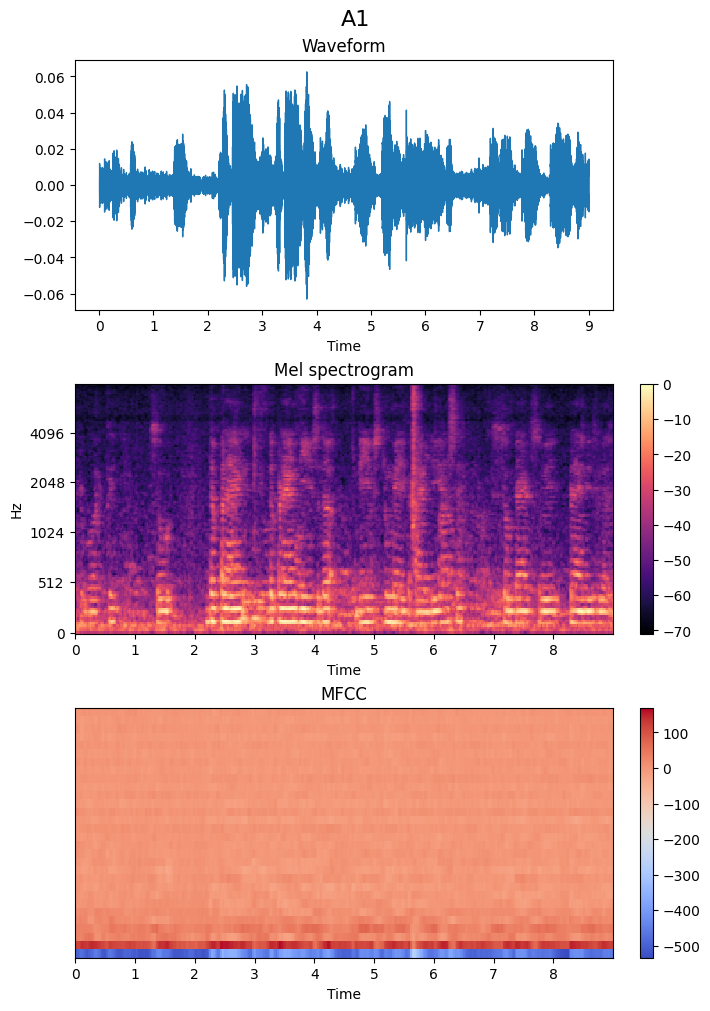

In [30]:
# Display data class "A1"
df_a1 = df_group.get_group("A1").sample()
display_data(df_a1.iloc[0]["Path"], df_a1.iloc[0]["Class"])

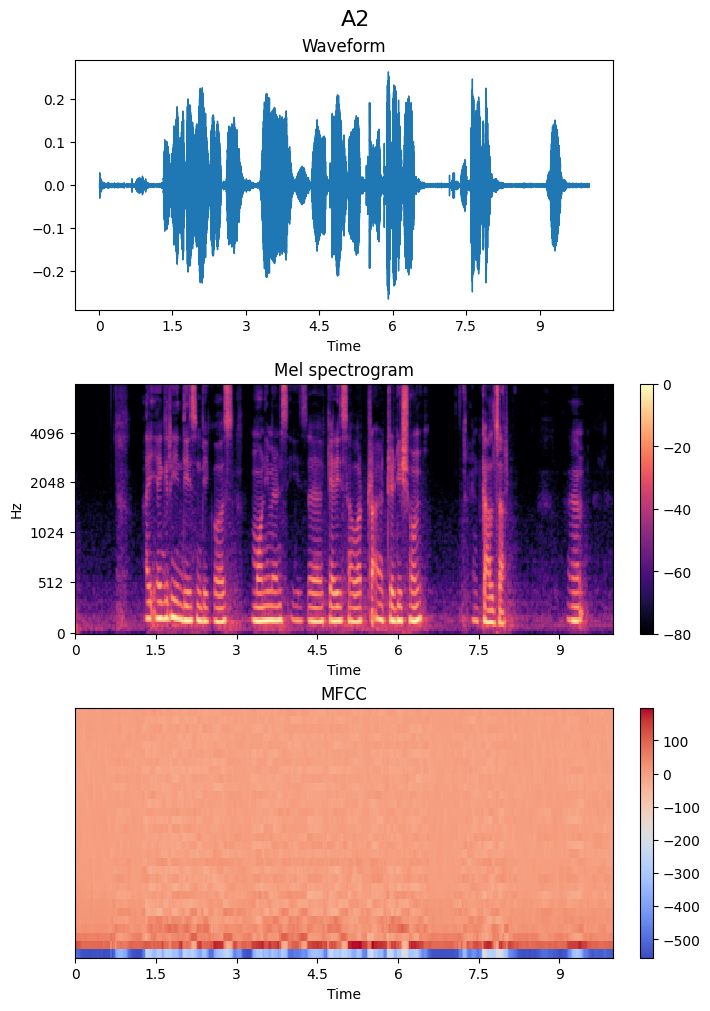

In [31]:
# Display data class "A2"
df_a2 = df_group.get_group("A2").sample()
display_data(df_a2.iloc[0]["Path"], df_a2.iloc[0]["Class"])

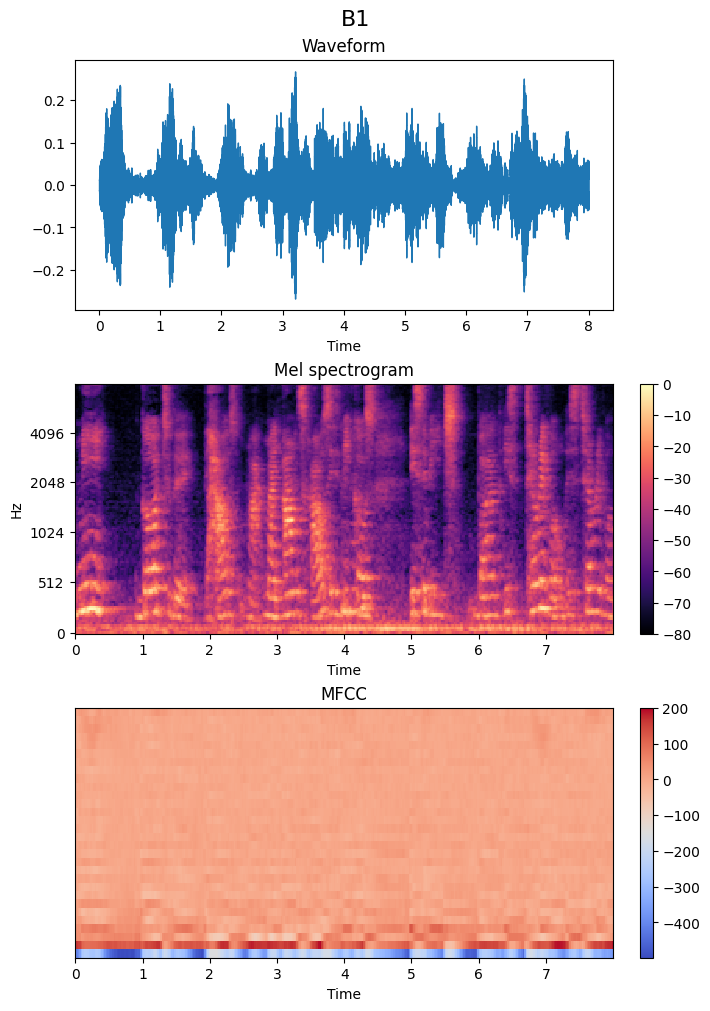

In [32]:
# Display data class "B1"
df_b1 = df_group.get_group("B1").sample()
display_data(df_b1.iloc[0]["Path"], df_b1.iloc[0]["Class"])

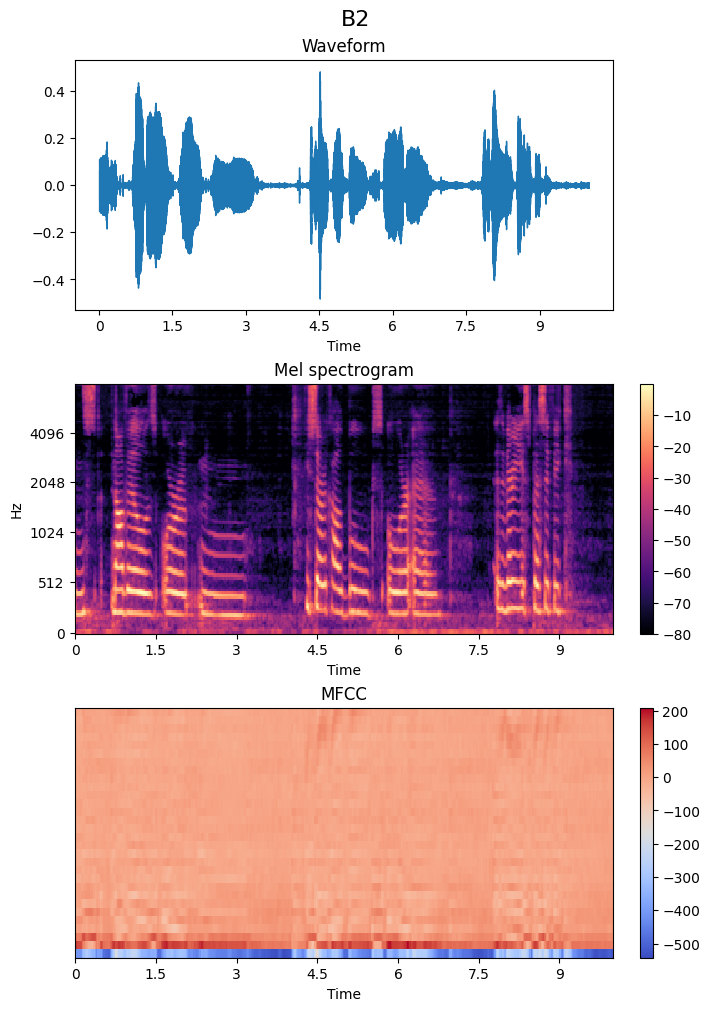

In [33]:
# Display data class "B2"
df_b2 = df_group.get_group("B2").sample()
display_data(df_b2.iloc[0]["Path"], df_b2.iloc[0]["Class"])

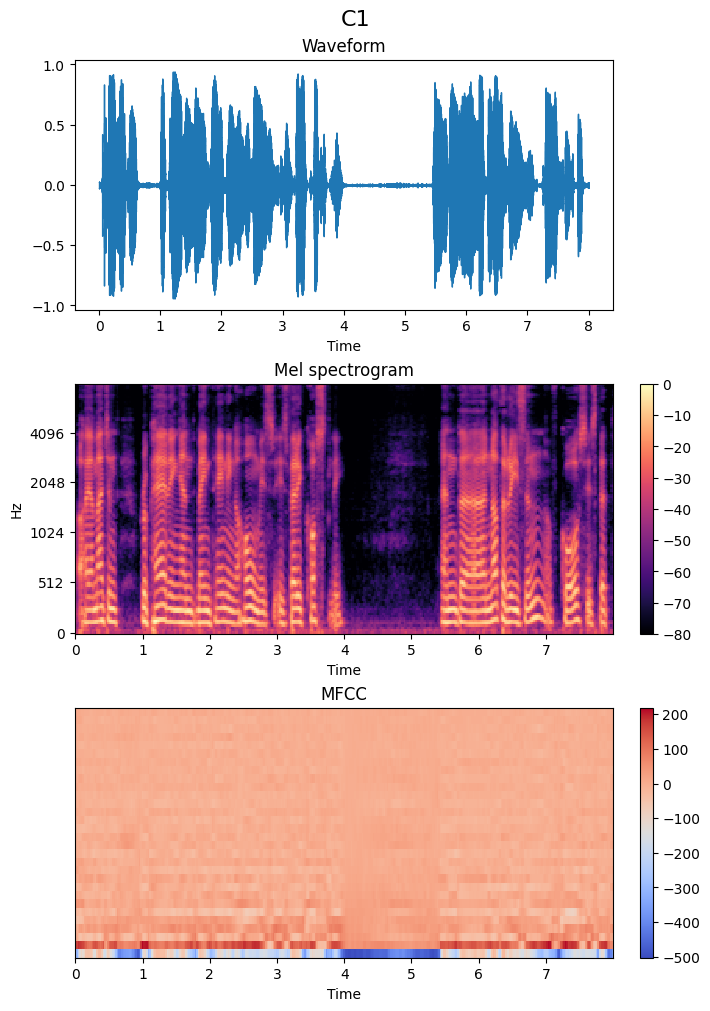

In [34]:
# Display data class "C1"
df_c1 = df_group.get_group("C1").sample()
display_data(df_c1.iloc[0]["Path"], df_c1.iloc[0]["Class"])

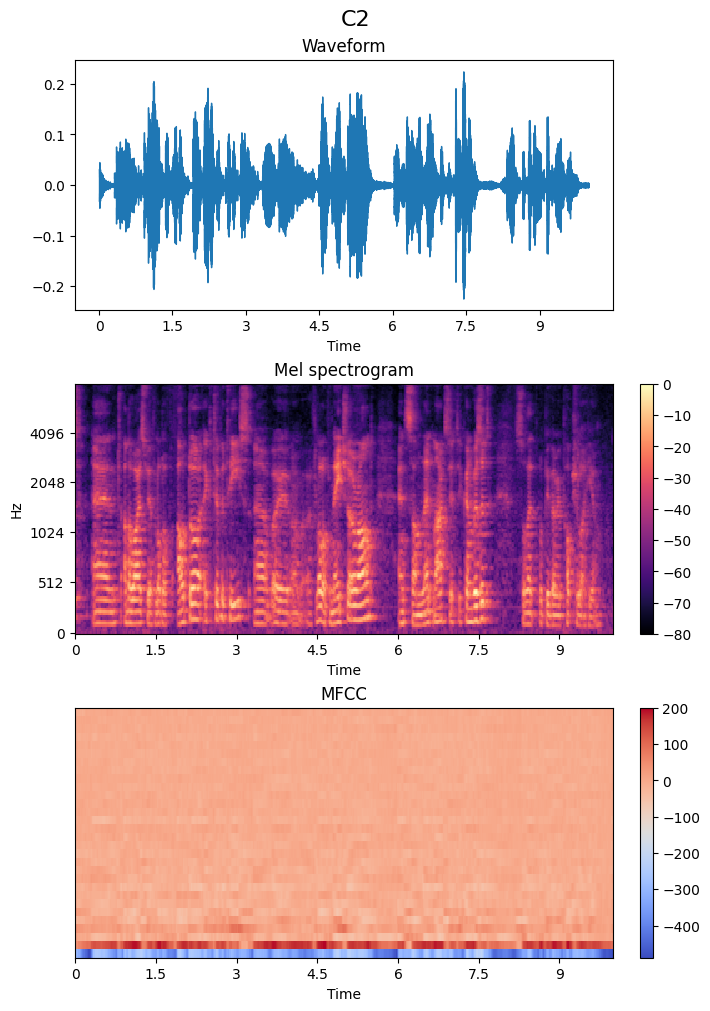

In [35]:
# Display data class "C2"
df_c2 = df_group.get_group("C2").sample()
display_data(df_c2.iloc[0]["Path"], df_c2.iloc[0]["Class"])

Next I will visualize count data in each class in dataset.

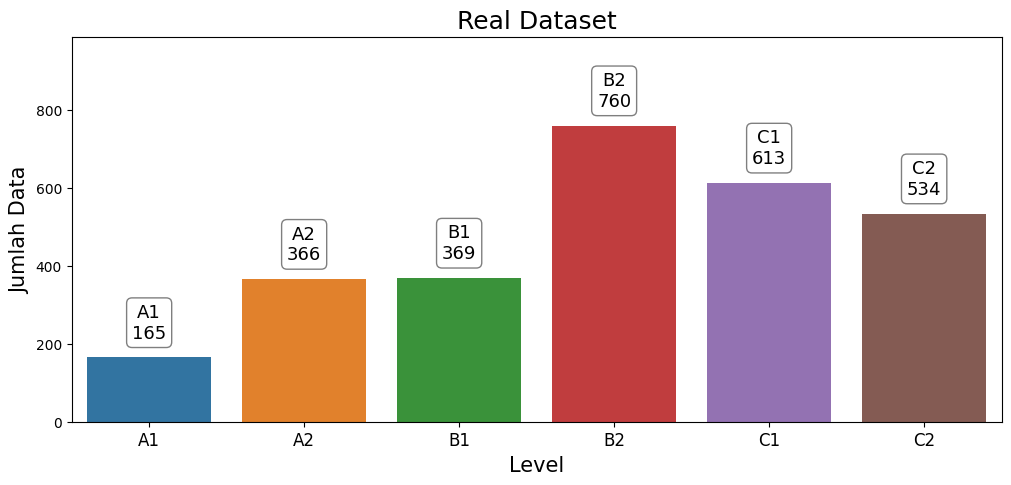

In [36]:
# Visualize real dataset
vis_data(df_folder_real, "Class", "Real Dataset")

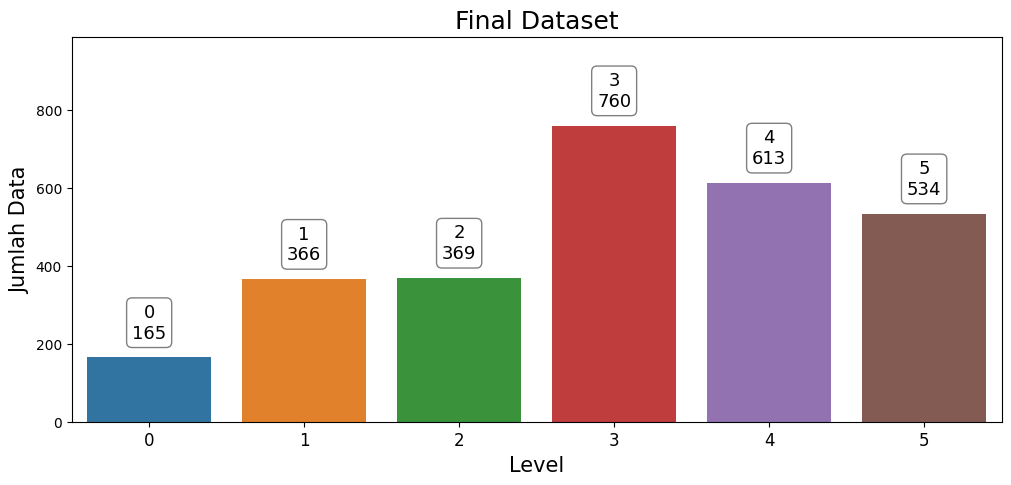

In [37]:
# Visualize merge dataset
vis_data(dataset_all, 33, "Final Dataset")

<div class="markdown-google-sans">

## **Save Dataset 🥳**
</div>

After all create dataset process have been done, last I will save the dataset in my drive folder. I will save the audio numpy, audio path dataframe, audio data dataframe, and all the visialization result.

To save numpy array, I will use [`save`](https://numpy.org/doc/stable/reference/generated/numpy.save.html) function to create Numpy file from Numpy.

In [38]:
# Save numpy
np.save(REAL_NUMPY_DATASET, dataset_real)

And to save dataframe, I will use [`to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) function to create a CSV file from Pandas.

In [39]:
# Generate audio path CSV
df_folder_real.to_csv(REAL_CSV)

In [40]:
# Generate audio data CSV
dataset_all.to_csv(DATASET_CSV)

Last in this section is save the dataset in my drive folder. To save the dataset I just copy the dataset into my dataset drive folder use `cp` commad from Ubuntu.

In [41]:
# Save data
!cp -r {COLAB_BASE_PATH + REAL_CSV} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + DATASET_CSV} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + REAL_NUMPY_DATASET} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + A1_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + A2_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + B1_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + B2_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + C1_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + C2_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + REAL_COUNT + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + FINAL_DATASET + PNG} {DRIVE_TARGET_PATH}

Now dataset is ready to use and available in my drive [CEFR Fluency Dataset](https://drive.google.com/drive/folders/1xXj1cSRyQ5-4eNS16tK0Vauai_nkLoFL?usp=sharing) folder.

<div class="markdown-google-sans">

## **Reference 🫡**
</div>

1.   [International language standards](https://www.cambridgeenglish.org/exams-and-tests/cefr/)
1.   [Audiomentations](https://iver56.github.io/audiomentations/)